### 두번째 실습. Keras 모델 생성/학습 - MNIST : CNN
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. 데이터 불러오기
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train.shape', X_train.shape)
print('y_train.shape', y_test.shape)
print('X_test.shape', X_train.shape)
print('y_test.shape', y_test.shape)

X_train.shape (60000, 28, 28)
y_train.shape (10000,)
X_test.shape (60000, 28, 28)
y_test.shape (10000,)


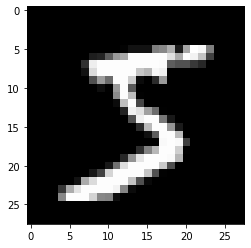

In [ ]:
# 2. 데이터 확인
plt.imshow(X_train[0], cmap=plt.cm.gray)

In [ ]:
# 3-1. 데이터 전처리 : 2차원 -> 3차원
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)    #흑백이니까 1
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)
print('X_train_reshaped ',X_train_reshaped.shape)
print('X_test_reshaped ',X_test_reshaped.shape)

X_train_reshaped  (60000, 28, 28, 1)
X_test_reshaped  (10000, 28, 28, 1)


In [ ]:
# 3-2. 데이터 전처리 : Normalzation 

X_train_reshaped = (X_train_reshaped-np.mean(X_train_reshaped))/np.std(X_train_reshaped)
X_test_reshaped = (X_test_reshaped-np.mean(X_test_reshaped))/np.std(X_test_reshaped)

In [ ]:
# 4. Label 전처리 (one-hot encoding) 
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [ ]:
# 5. 모델 생성 : CNN
from tensorflow import keras
# from keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model = keras.Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding='same',          # same/valid
                 activation='relu',
                 input_shape=(28,28,1)))   
model.add(Conv2D(32, (3,3),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))  #이미지 사이즈 줄여줌/
model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 1,618,026
Trainable params: 1,618,026
Non-trainable params: 0
____________________________________________

In [ ]:
# 6. Compile - Optimizer, Loss function 설정
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 7. 모델 학습
batch_size =64
epochs=50


history = model.fit(X_train_reshaped, y_train_encoded,
                    batch_size= batch_size,
                    epochs=epochs,
                    validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 3s 4ms/step - loss: 0.3844 - accuracy: 0.8880 - val_loss: 0.1781 - val_accuracy: 0.9452
Epoch 2/50
750/750 [==============================] - 3s 4ms/step - loss: 0.1580 - accuracy: 0.9527 - val_loss: 0.1248 - val_accuracy: 0.9640
Epoch 3/50
750/750 [==============================] - 3s 4ms/step - loss: 0.1118 - accuracy: 0.9663 - val_loss: 0.1006 - val_accuracy: 0.9697
Epoch 4/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0865 - accuracy: 0.9733 - val_loss: 0.0823 - val_accuracy: 0.9763
Epoch 5/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0689 - accuracy: 0.9791 - val_loss: 0.0824 - val_accuracy: 0.9745
Epoch 6/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0573 - accuracy: 0.9827 - val_loss: 0.0873 - val_accuracy: 0.9743
Epoch 7/50
750/750 [==============================] - 3s 4ms/step - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.0626 - val_accuracy: 0.9808
Epoch 

In [ ]:
# 8. 모델 평가
loss_test, acc_test = model.evaluate(X_test_reshaped, y_test_encoded)

print('loss_test',loss_test)
print('acc_test',acc_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0555 - accuracy: 0.9864
loss_test 0.05551757290959358
acc_test 0.9864000082015991


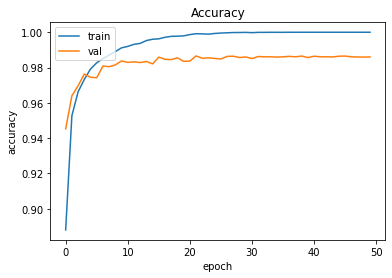

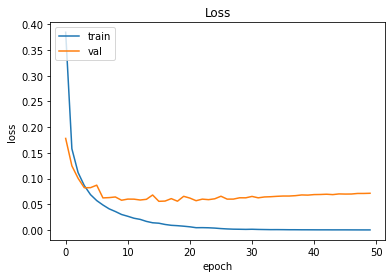

In [ ]:
# 9. 학습 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()


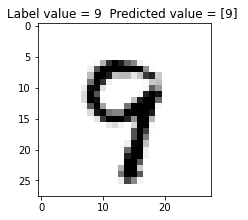

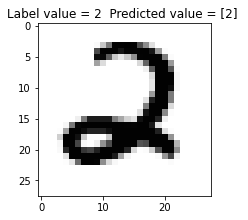

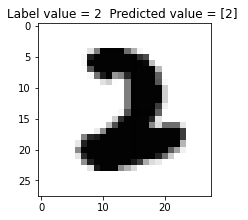

In [ ]:
# 10. 이미지 랜덤 선택 -> 훈련된 모델로 예측
for index in np.random.choice(len(y_test), 3, replace = False):
    test_image = X_test[index].reshape(1, 28, 28,1)
    predicted = model.predict(test_image)
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = X_test
    plt.imshow(images[index].reshape(28, 28), cmap = 'Greys', interpolation = 'nearest')
    plt.show()


In [ ]:
from google.colab import files

upload = files.upload()

Saving 캡처.JPG to 캡처 (2).JPG


In [ ]:
ls

'캡처 (1).JPG'  '캡처 (2).JPG'   캡처.JPG   sample_data/


In [ ]:
import cv2
image = cv2.imread('캡처 (2).JPG',
                   cv2.IMREAD_GRAYSCALE)

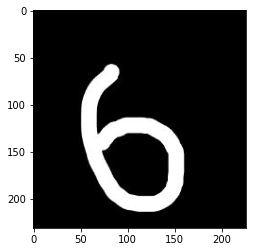

In [ ]:
plt.imshow(image, cmap=plt.cm.gray)

In [ ]:
image_resized = cv2.resize(image, dsize=(28,28), interpolation=cv2.INTER_AREA)

In [ ]:
print(image.shape)

image_reshaped = image_resized.reshape(28,28,1)
print(image_reshaped.shape)

(231, 226)
(28, 28, 1)


In [ ]:
print(model.predict([image_reshaped.reshape(1, 28, 28,1)]))

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
